# <span style="color:darkblue"> Lecture 11: Application 1 - Linear Regression </span>

<font size = "5">

We will fit statistical models to data

- I will give an intro with minimal stats background
- See the optional lecture file for advanced users

The primary goal is to practice previous commands

# <span style="color:darkblue"> I. Import Libraries </span>


In [25]:
# The "pandas" library is used for processing datasets
# The "numpy" is for numeric observations and random numbers
# The "matplotlib.pyplot" library is for creating graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<font size = "5">

Install the "statsmodels" library

```conda install statsmodels```

- In Windows, you can do this by opening the program  <br> "anaconda
prompt" and typing the above command.
- In Mac, you can open your terminal and <br>
type the above command

In [26]:
# We will "alias" two sublibraries in "statsmodels"
# "statsmodels.formula.api" contains functions to estimate models
# "statsmodels.api" contains general-use statistical options

import statsmodels.api as sm
import statsmodels.formula.api as smf


# <span style="color:darkblue"> II. Generate simulated Data </span>

<font size = "5">

Create an empty dataset

In [27]:
dataset = pd.DataFrame()

<font size = "5">

Create two random variables of size ($n = 50$)

In [28]:
n = 50
np.random.seed(42)
dataset["x"] = np.random.normal(loc = 0,scale = 1, size = n)
dataset["e"] = np.random.normal(loc = 0,scale = 1, size = n)

<font size = "5">

Create data from the linear model

$ y = b_0 + b_1 x + e, \qquad b_0 = 1, b_1 = 2.$

In [29]:
# The number b0 is known as the "intercept"
# The number b1 is known as the "slope"

b0 = 1
b1 = 2

# We can compute formulas directly over dataset columns
dataset["y"] = b0 + b1 * dataset["x"] + dataset["e"]

In [30]:
dataset['y']

0     2.317512
1     0.338389
2     1.618455
3     4.657736
4     1.562693
5     1.463006
6     3.319208
7     2.225657
8     0.392315
9     3.060665
10   -0.406010
11   -0.117118
12    0.377590
13   -4.022767
14   -1.637310
15    1.231665
16   -1.097672
17    2.632028
18   -0.454412
19   -2.469727
20    4.292693
21    2.086484
22    1.099230
23   -0.284853
24   -2.708511
25    2.043748
26   -1.214940
27    1.452389
28   -0.109517
29   -1.570956
30   -0.423085
31    5.061669
32    2.450900
33   -1.633692
34    1.836596
35   -1.943444
36    2.333129
37   -2.590589
38   -2.186132
39    1.906990
40    2.574011
41    2.311382
42    0.066650
43    0.070130
44   -2.349152
45   -1.903203
46    0.374843
47    3.375300
48    1.692350
49   -2.760667
Name: y, dtype: float64

<font size = "5">

Compute the theoretically best fit line

$ p = b_0 + b_1 x$

In [31]:
dataset["p"] = b0 + b1*dataset["x"]
#formua for the predictable componet is the equation without the error variable 

<font size = "5">

Plot the data

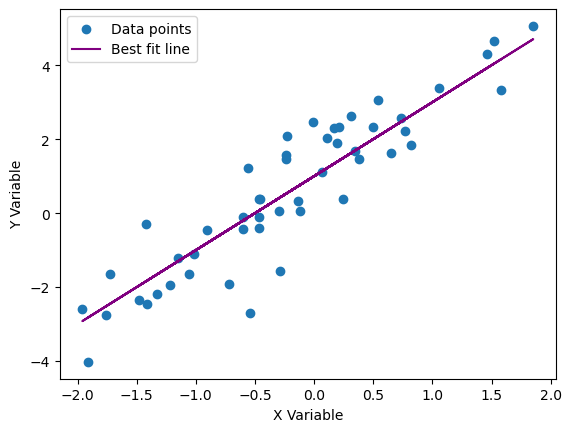

In [32]:
plt.scatter(x = dataset["x"], y = dataset["y"])
plt.plot(dataset["x"],dataset["p"], color = 'purple')

plt.xlabel("X Variable")
plt.ylabel("Y Variable")
plt.legend(labels = ["Data points", "Best fit line"])
plt.show()
#keep order of the data the same 

<font size = "5" >

Try it yourself

- Create a new dataset called $\quad$```subset_above2``` 
- Subset records with $y \ge 2$ using $\quad$```.query()```
- Count the original rows $\quad$ ```len(dataset)```
- Count the subsetted rows $\quad$ ```len(subset_above2)```
- Compute the proportion of subsetted observations


In [33]:
# Write your own code here

#make dataset
subset_above2 = pd.DataFrame()

#fill up that dataset with the subseted info 
subset_above2 = dataset.query("y >= 2")

#check the lengths 
print(len(dataset))
print(len(subset_above2))

#proportion 
print(len(subset_above2)/len(dataset))



50
15
0.3


<font size = "5">

Try it yourself!

- Store the sample mean of $y$ as $\quad$ ```ybar```
- Compute the standard deviation of $y$ $\quad$ ```stdv_sample```
- Use ```.query()``` to subset observations that satisfy

$ \qquad abs\left(y - ybar \right) \le stdv\_sample $

$\quad$ HINT: Use ```.mean()```,$\text{ }$ ```.std()``` <br>
$\quad$ HINT: Use the globals  $\ $ ```@xbar```,$\text{ }$ ```@stdv_sample```

In [34]:
# Note: abs(...) is the absolute value function
# Write your own code 
#need to pull mean from jyst the y and not the entire dataset which is why we need to check length of dataset
ybar = dataset["y"].mean()
stdv_sample= dataset["y"].std()

threshold= dataset.query("(abs(y-@ybar) <= @stdv_sample)")
len(threshold)



33

# <span style="color:darkblue"> II. Estimate the best fit line</span>


<font size = "5">

We have data on $(y,x)$ but we don't know $(b_0,b_1, e)$

<font size = "5">

Let's fit an OLS model

- It's a statistical approach to get $(b_0,b_1)$
- No need to know how it works but why we want it

In [35]:
#------------------------------------------------------------------------------#
# We use the subfunction "ols()" in the library "smf"
#---- (i) The first argument is a string called "formula" with the format 
#-------- "outcome ~ indepdent_vars"
#----(ii) the second argument is the dataset
# The second line fits the model with standard errors "cov". In this case we 
# use "robust" standard errors (HC1)
#-------------------------------------------------------------------------------#

model = smf.ols(formula = 'y ~  x', data = dataset)
results = model.fit()
#whats on the right is the predictor and whats on the left is outcome so think y= grade and x= hours studying 

# Can also run as one line
# results = smf.ols(formula = 'y ~ x',data = dataset).fit(cov = "HC1")


<font size = "5">

Compute the estimated best fit line

In [36]:
# We will use ".params" to get the attribute "parameters from the results"

b_list = results.params
#params is object within results?
print(b_list)

# We can then compute the "estimated" best fit lines
# by extracting the intercept and slop from "b_list"

dataset["p_estimated"] = b_list[0] + b_list[1]  * dataset["x"]

# Note: The estimators for "b0" and "b1" are close to 
# the values we used to generate the data


Intercept    1.041022
x            2.103076
dtype: float64


<font size = "5">

Plot the best fit line

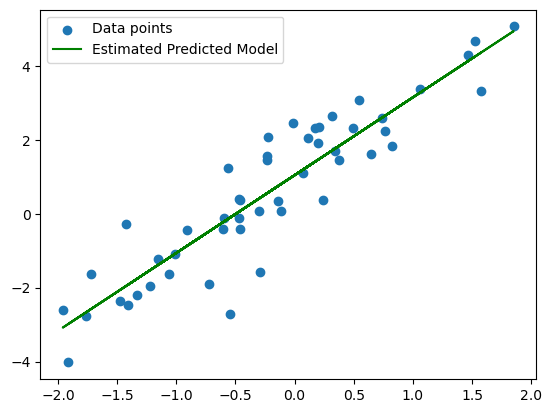

In [37]:
# Use scatter twice, with different "y" inputs
# THe "legend" command creates a box on with the color labels

plt.scatter(x = dataset["x"],y = dataset["y"])
plt.plot(dataset["x"],dataset["p_estimated"], color = 'green')

plt.legend(labels = ["Data points","Estimated Predicted Model"])
plt.show()


<font size = "5">

Try it yourself!
- How good is the estimated fit?
- Create two overlapping lineplots
- $(p \text{ }$ vs $\text{ } x)$ and $(p_{estimated} \text{ }$ vs $\text{ } x)$
- Create a legend to label each plot

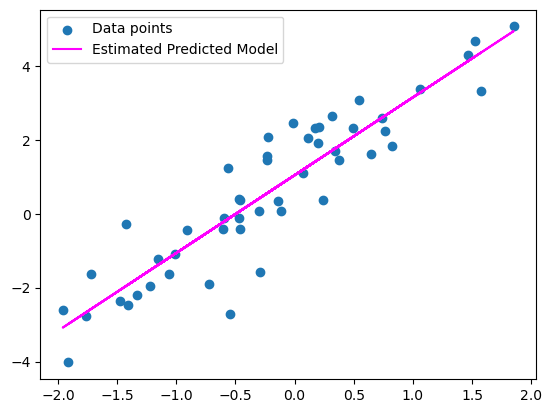

In [38]:
# Write your own code

model = smf.ols(formula = 'p ~  x', data = dataset) 
plt.scatter(x = dataset["x"],y = dataset["y"])

model2 = smf.ols(formula = 'p_estimated ~  x', data = dataset) 
plt.plot(dataset["x"],dataset["p_estimated"], color = 'magenta')



plt.legend(labels = ["Data points","Estimated Predicted Model"])
plt.show()




<font size = "5">

Try it youself

- Compute a column with the formula

$\quad$ ``` sample_error = y - p_estimated```

- Create a lambda function <br>

$\quad$ ``` fn_positive_error = lambda error: error >= 0  ```

- Compute a column for whether the error is positive <br>
using ``` .apply()```



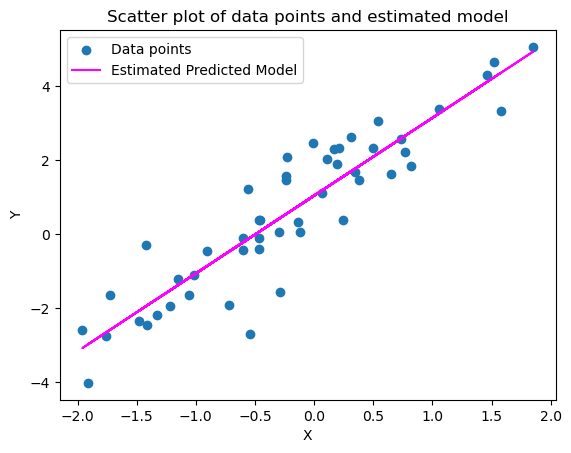

           x         e         y         p  p_estimated  sample_error  \
0   0.496714  0.324084  2.317512  1.993428     2.085649      0.231863   
1  -0.138264 -0.385082  0.338389  0.723471     0.750241     -0.411852   
2   0.647689 -0.676922  1.618455  2.295377     2.403160     -0.784705   
3   1.523030  0.611676  4.657736  4.046060     4.244069      0.413667   
4  -0.234153  1.031000  1.562693  0.531693     0.548579      1.014113   
5  -0.234137  0.931280  1.463006  0.531726     0.548614      0.914392   
6   1.579213 -0.839218  3.319208  4.158426     4.362226     -1.043018   
7   0.767435 -0.309212  2.225657  2.534869     2.654995     -0.429338   
8  -0.469474  0.331263  0.392315  0.061051     0.053682      0.338633   
9   0.542560  0.975545  3.060665  2.085120     2.182067      0.878599   
10 -0.463418 -0.479174 -0.406010  0.073165     0.066419     -0.472429   
11 -0.465730 -0.185659 -0.117118  0.068540     0.061557     -0.178675   
12  0.241962 -1.106335  0.377590  1.483925     1.54

In [41]:
# Write your own code
#sample_error= y - p_estimated

#fn_positive_error = lambda error : error >= 0

# Compute sample_error = y - p_estimated
dataset['sample_error'] = dataset['y'] - dataset['p_estimated']

# Lambda function to check if error is positive (>= 0)
fn_positive_error = lambda error: error >= 0

# Create a new column "positive_error" using .apply() and the lambda function
dataset['positive_error'] = dataset['sample_error'].apply(fn_positive_error)

# Plotting the data and the model
plt.scatter(dataset["x"], dataset["y"], label="Data points")  # Plot the actual data points
plt.plot(dataset["x"], dataset["p_estimated"], color='magenta', label="Estimated Predicted Model")  # Plot the estimated line

# Add labels and legend
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter plot of data points and estimated model")
plt.legend()

# Show the plot
plt.show()

# Display the updated DataFrame with sample_error and positive_error columns
print(dataset)


<font size = "5">

Try it yourself

- Compute a new column <br>

```error_sqr = sample_error ** 2```

- Calculate the mean of ```error_sqr```

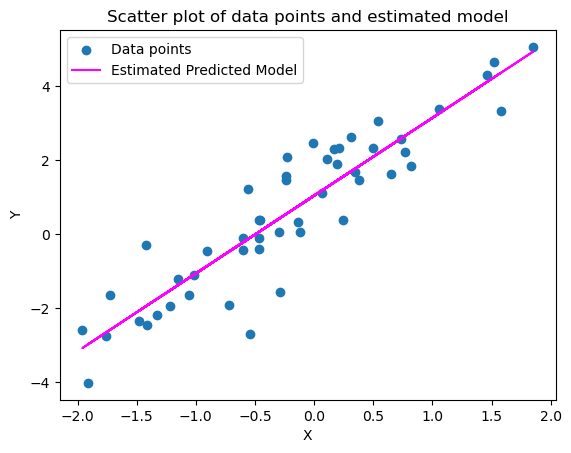

           x         e         y         p  p_estimated  sample_error  \
0   0.496714  0.324084  2.317512  1.993428     2.085649      0.231863   
1  -0.138264 -0.385082  0.338389  0.723471     0.750241     -0.411852   
2   0.647689 -0.676922  1.618455  2.295377     2.403160     -0.784705   
3   1.523030  0.611676  4.657736  4.046060     4.244069      0.413667   
4  -0.234153  1.031000  1.562693  0.531693     0.548579      1.014113   
5  -0.234137  0.931280  1.463006  0.531726     0.548614      0.914392   
6   1.579213 -0.839218  3.319208  4.158426     4.362226     -1.043018   
7   0.767435 -0.309212  2.225657  2.534869     2.654995     -0.429338   
8  -0.469474  0.331263  0.392315  0.061051     0.053682      0.338633   
9   0.542560  0.975545  3.060665  2.085120     2.182067      0.878599   
10 -0.463418 -0.479174 -0.406010  0.073165     0.066419     -0.472429   
11 -0.465730 -0.185659 -0.117118  0.068540     0.061557     -0.178675   
12  0.241962 -1.106335  0.377590  1.483925     1.54

In [42]:
# Write your own code

# Compute error_sqr = sample_error ** 2
dataset['error_sqr'] = dataset['sample_error'] ** 2

# Calculate the mean of error_sqr
mean_error_sqr = dataset['error_sqr'].mean()

# Plotting the data and the model
plt.scatter(dataset["x"], dataset["y"], label="Data points")  # Plot the actual data points
plt.plot(dataset["x"], dataset["p_estimated"], color='magenta', label="Estimated Predicted Model")  # Plot the estimated line

# Add labels and legend
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter plot of data points and estimated model")
plt.legend()

# Show the plot
plt.show()

# Display the updated DataFrame with sample_error, positive_error, error_sqr columns
print(dataset)

# Display the mean of error_sqr
print("Mean of error_sqr:", mean_error_sqr)
